In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
import tensorflow as tf
from keras.layers.merge import concatenate

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train = np.linspace(0.0,1.0,N)
y_train1 = np.sin(2*np.pi*X_train)
y_train2 = np.exp(X_train)

X_val = np.random.rand(100)
X_val = np.sort(X_val)
y_val1 = np.sin(2*np.pi*X_val)
y_val2 = np.exp(X_val)

In [4]:
#Define model
x0_left = Input(shape = (1,))
x0_right = Input(shape = (1,))

x1_left = Dense(20,activation = 'sigmoid',kernel_initializer = "uniform")(x0_left)
x1_right = Dense(20,activation = 'sigmoid',kernel_initializer = "uniform")(x0_right)

x3 = concatenate([x1_left,x1_right])
x4 = Dense(20, activation = 'sigmoid', kernel_initializer = "uniform")(x3)

x5_left = Dense(20,activation = 'sigmoid',kernel_initializer = "uniform")(x4)
x5_right = Dense(30, activation = 'sigmoid', kernel_initializer = "uniform")(x4)

x6_left = Dense(20,activation = 'sigmoid',kernel_initializer = "uniform")(x5_left)
x6_right = Dense(30, activation = 'sigmoid', kernel_initializer = "uniform")(x5_right)

x6_left = Dense(1,kernel_initializer = "uniform")(x5_left)
x6_right = Dense(1,kernel_initializer = "uniform")(x5_right)
                                                                             
model = Model(inputs = [x0_left,x0_right], outputs = [x5_left,x5_right])
model.compile(optimizer = 'rmsprop', loss = ['mse','mse'],metrics = 'mse')
hist = model.fit([X_train,X_train],[y_train1,y_train2],epochs = 300, batch_size = 32,
                 validation_data = ([X_val,X_val],[y_val1,y_val2]))
    

Epoch 1/300
32/32 [==============================] - 1s 15ms/step - loss: 2.3166 - dense_3_loss: 0.6949 - dense_4_loss: 1.6217 - dense_3_mse: 0.6949 - dense_4_mse: 1.6217 - val_loss: 1.9943 - val_dense_3_loss: 0.6228 - val_dense_4_loss: 1.3714 - val_dense_3_mse: 0.6228 - val_dense_4_mse: 1.3714
Epoch 2/300
32/32 [==============================] - 0s 4ms/step - loss: 1.8522 - dense_3_loss: 0.5906 - dense_4_loss: 1.2616 - dense_3_mse: 0.5906 - dense_4_mse: 1.2616 - val_loss: 1.6583 - val_dense_3_loss: 0.5468 - val_dense_4_loss: 1.1116 - val_dense_3_mse: 0.5468 - val_dense_4_mse: 1.1116
Epoch 3/300
32/32 [==============================] - 0s 4ms/step - loss: 1.6648 - dense_3_loss: 0.5685 - dense_4_loss: 1.0963 - dense_3_mse: 0.5685 - dense_4_mse: 1.0963 - val_loss: 1.4624 - val_dense_3_loss: 0.5121 - val_dense_4_loss: 0.9503 - val_dense_3_mse: 0.5121 - val_dense_4_mse: 0.9503
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 1.4164 - dense_3_loss: 0.4975 - dense_4_l

Epoch 29/300
32/32 [==============================] - 0s 4ms/step - loss: 1.2065 - dense_3_loss: 0.4970 - dense_4_loss: 0.7095 - dense_3_mse: 0.4970 - dense_4_mse: 0.7095 - val_loss: 1.2292 - val_dense_3_loss: 0.4825 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4825 - val_dense_4_mse: 0.7467
Epoch 30/300
32/32 [==============================] - 0s 6ms/step - loss: 1.2796 - dense_3_loss: 0.4849 - dense_4_loss: 0.7947 - dense_3_mse: 0.4849 - dense_4_mse: 0.7947 - val_loss: 1.2291 - val_dense_3_loss: 0.4824 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4824 - val_dense_4_mse: 0.7467
Epoch 31/300
32/32 [==============================] - 0s 4ms/step - loss: 1.2596 - dense_3_loss: 0.4923 - dense_4_loss: 0.7673 - dense_3_mse: 0.4923 - dense_4_mse: 0.7673 - val_loss: 1.2290 - val_dense_3_loss: 0.4822 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4822 - val_dense_4_mse: 0.7467
Epoch 32/300
32/32 [==============================] - 0s 4ms/step - loss: 1.2714 - dense_3_loss: 0.4956 - dense_

Epoch 57/300
32/32 [==============================] - 0s 9ms/step - loss: 1.2832 - dense_3_loss: 0.4890 - dense_4_loss: 0.7942 - dense_3_mse: 0.4890 - dense_4_mse: 0.7942 - val_loss: 1.2225 - val_dense_3_loss: 0.4757 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4757 - val_dense_4_mse: 0.7467
Epoch 58/300
32/32 [==============================] - 0s 4ms/step - loss: 1.2309 - dense_3_loss: 0.4788 - dense_4_loss: 0.7521 - dense_3_mse: 0.4788 - dense_4_mse: 0.7521 - val_loss: 1.2218 - val_dense_3_loss: 0.4751 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4751 - val_dense_4_mse: 0.7467
Epoch 59/300
32/32 [==============================] - 0s 4ms/step - loss: 1.2193 - dense_3_loss: 0.4821 - dense_4_loss: 0.7373 - dense_3_mse: 0.4821 - dense_4_mse: 0.7373 - val_loss: 1.2213 - val_dense_3_loss: 0.4746 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4746 - val_dense_4_mse: 0.7467
Epoch 60/300
32/32 [==============================] - 0s 5ms/step - loss: 1.2649 - dense_3_loss: 0.5060 - dense_

Epoch 85/300
32/32 [==============================] - 0s 5ms/step - loss: 1.2215 - dense_3_loss: 0.4581 - dense_4_loss: 0.7635 - dense_3_mse: 0.4581 - dense_4_mse: 0.7635 - val_loss: 1.1958 - val_dense_3_loss: 0.4490 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4490 - val_dense_4_mse: 0.7467
Epoch 86/300
32/32 [==============================] - 0s 9ms/step - loss: 1.1947 - dense_3_loss: 0.4624 - dense_4_loss: 0.7323 - dense_3_mse: 0.4624 - dense_4_mse: 0.7323 - val_loss: 1.1942 - val_dense_3_loss: 0.4475 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4475 - val_dense_4_mse: 0.7467
Epoch 87/300
32/32 [==============================] - 0s 6ms/step - loss: 1.1914 - dense_3_loss: 0.4656 - dense_4_loss: 0.7258 - dense_3_mse: 0.4656 - dense_4_mse: 0.7258 - val_loss: 1.1924 - val_dense_3_loss: 0.4456 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.4456 - val_dense_4_mse: 0.7467
Epoch 88/300
32/32 [==============================] - 0s 6ms/step - loss: 1.2045 - dense_3_loss: 0.4491 - dense_

Epoch 113/300
32/32 [==============================] - 0s 4ms/step - loss: 1.1372 - dense_3_loss: 0.3946 - dense_4_loss: 0.7426 - dense_3_mse: 0.3946 - dense_4_mse: 0.7426 - val_loss: 1.1362 - val_dense_3_loss: 0.3895 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3895 - val_dense_4_mse: 0.7467
Epoch 114/300
32/32 [==============================] - 0s 4ms/step - loss: 1.1100 - dense_3_loss: 0.3714 - dense_4_loss: 0.7386 - dense_3_mse: 0.3714 - dense_4_mse: 0.7386 - val_loss: 1.1334 - val_dense_3_loss: 0.3867 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3867 - val_dense_4_mse: 0.7467
Epoch 115/300
32/32 [==============================] - 0s 5ms/step - loss: 1.1550 - dense_3_loss: 0.3824 - dense_4_loss: 0.7726 - dense_3_mse: 0.3824 - dense_4_mse: 0.7726 - val_loss: 1.1311 - val_dense_3_loss: 0.3844 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3844 - val_dense_4_mse: 0.7467
Epoch 116/300
32/32 [==============================] - 0s 5ms/step - loss: 1.1457 - dense_3_loss: 0.3718 - de

Epoch 141/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0986 - dense_3_loss: 0.3301 - dense_4_loss: 0.7686 - dense_3_mse: 0.3301 - dense_4_mse: 0.7686 - val_loss: 1.0763 - val_dense_3_loss: 0.3295 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3295 - val_dense_4_mse: 0.7467
Epoch 142/300
32/32 [==============================] - 0s 5ms/step - loss: 1.1240 - dense_3_loss: 0.3170 - dense_4_loss: 0.8070 - dense_3_mse: 0.3170 - dense_4_mse: 0.8070 - val_loss: 1.0747 - val_dense_3_loss: 0.3280 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3280 - val_dense_4_mse: 0.7467
Epoch 143/300
32/32 [==============================] - 0s 3ms/step - loss: 1.0733 - dense_3_loss: 0.3277 - dense_4_loss: 0.7456 - dense_3_mse: 0.3277 - dense_4_mse: 0.7456 - val_loss: 1.0735 - val_dense_3_loss: 0.3268 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3268 - val_dense_4_mse: 0.7467
Epoch 144/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0715 - dense_3_loss: 0.3228 - de

Epoch 169/300
32/32 [==============================] - 0s 4ms/step - loss: 1.1089 - dense_3_loss: 0.3103 - dense_4_loss: 0.7986 - dense_3_mse: 0.3103 - dense_4_mse: 0.7986 - val_loss: 1.0511 - val_dense_3_loss: 0.3044 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3044 - val_dense_4_mse: 0.7467
Epoch 170/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0671 - dense_3_loss: 0.3127 - dense_4_loss: 0.7544 - dense_3_mse: 0.3127 - dense_4_mse: 0.7544 - val_loss: 1.0506 - val_dense_3_loss: 0.3038 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3038 - val_dense_4_mse: 0.7467
Epoch 171/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0292 - dense_3_loss: 0.3035 - dense_4_loss: 0.7257 - dense_3_mse: 0.3035 - dense_4_mse: 0.7257 - val_loss: 1.0508 - val_dense_3_loss: 0.3040 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.3040 - val_dense_4_mse: 0.7467
Epoch 172/300
32/32 [==============================] - 0s 6ms/step - loss: 1.0297 - dense_3_loss: 0.2973 - de

Epoch 197/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0877 - dense_3_loss: 0.2929 - dense_4_loss: 0.7948 - dense_3_mse: 0.2929 - dense_4_mse: 0.7948 - val_loss: 1.0440 - val_dense_3_loss: 0.2972 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2972 - val_dense_4_mse: 0.7467
Epoch 198/300
32/32 [==============================] - 0s 7ms/step - loss: 1.0376 - dense_3_loss: 0.2964 - dense_4_loss: 0.7412 - dense_3_mse: 0.2964 - dense_4_mse: 0.7412 - val_loss: 1.0437 - val_dense_3_loss: 0.2970 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2970 - val_dense_4_mse: 0.7467
Epoch 199/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0424 - dense_3_loss: 0.2888 - dense_4_loss: 0.7536 - dense_3_mse: 0.2888 - dense_4_mse: 0.7536 - val_loss: 1.0435 - val_dense_3_loss: 0.2968 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2968 - val_dense_4_mse: 0.7467
Epoch 200/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0322 - dense_3_loss: 0.2916 - de

Epoch 225/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0458 - dense_3_loss: 0.2894 - dense_4_loss: 0.7563 - dense_3_mse: 0.2894 - dense_4_mse: 0.7563 - val_loss: 1.0411 - val_dense_3_loss: 0.2943 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2943 - val_dense_4_mse: 0.7467
Epoch 226/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0252 - dense_3_loss: 0.2970 - dense_4_loss: 0.7282 - dense_3_mse: 0.2970 - dense_4_mse: 0.7282 - val_loss: 1.0410 - val_dense_3_loss: 0.2943 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2943 - val_dense_4_mse: 0.7467
Epoch 227/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0265 - dense_3_loss: 0.2911 - dense_4_loss: 0.7354 - dense_3_mse: 0.2911 - dense_4_mse: 0.7354 - val_loss: 1.0410 - val_dense_3_loss: 0.2943 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2943 - val_dense_4_mse: 0.7467
Epoch 228/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0478 - dense_3_loss: 0.2840 - de

Epoch 253/300
32/32 [==============================] - 0s 5ms/step - loss: 0.9965 - dense_3_loss: 0.2753 - dense_4_loss: 0.7212 - dense_3_mse: 0.2753 - dense_4_mse: 0.7212 - val_loss: 1.0394 - val_dense_3_loss: 0.2927 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2927 - val_dense_4_mse: 0.7467
Epoch 254/300
32/32 [==============================] - 0s 3ms/step - loss: 1.1013 - dense_3_loss: 0.3039 - dense_4_loss: 0.7974 - dense_3_mse: 0.3039 - dense_4_mse: 0.7974 - val_loss: 1.0392 - val_dense_3_loss: 0.2925 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2925 - val_dense_4_mse: 0.7467
Epoch 255/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0424 - dense_3_loss: 0.2976 - dense_4_loss: 0.7448 - dense_3_mse: 0.2976 - dense_4_mse: 0.7448 - val_loss: 1.0391 - val_dense_3_loss: 0.2924 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2924 - val_dense_4_mse: 0.7467
Epoch 256/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0326 - dense_3_loss: 0.2909 - de

Epoch 281/300
32/32 [==============================] - 0s 5ms/step - loss: 1.0634 - dense_3_loss: 0.3105 - dense_4_loss: 0.7529 - dense_3_mse: 0.3105 - dense_4_mse: 0.7529 - val_loss: 1.0376 - val_dense_3_loss: 0.2909 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2909 - val_dense_4_mse: 0.7467
Epoch 282/300
32/32 [==============================] - 0s 4ms/step - loss: 1.0946 - dense_3_loss: 0.3113 - dense_4_loss: 0.7833 - dense_3_mse: 0.3113 - dense_4_mse: 0.7833 - val_loss: 1.0375 - val_dense_3_loss: 0.2907 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2907 - val_dense_4_mse: 0.7467
Epoch 283/300
32/32 [==============================] - 0s 10ms/step - loss: 1.0081 - dense_3_loss: 0.2883 - dense_4_loss: 0.7198 - dense_3_mse: 0.2883 - dense_4_mse: 0.7198 - val_loss: 1.0374 - val_dense_3_loss: 0.2907 - val_dense_4_loss: 0.7467 - val_dense_3_mse: 0.2907 - val_dense_4_mse: 0.7467
Epoch 284/300
32/32 [==============================] - 0s 6ms/step - loss: 1.0239 - dense_3_loss: 0.2932 - d

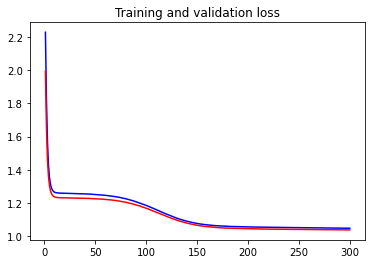

In [5]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()

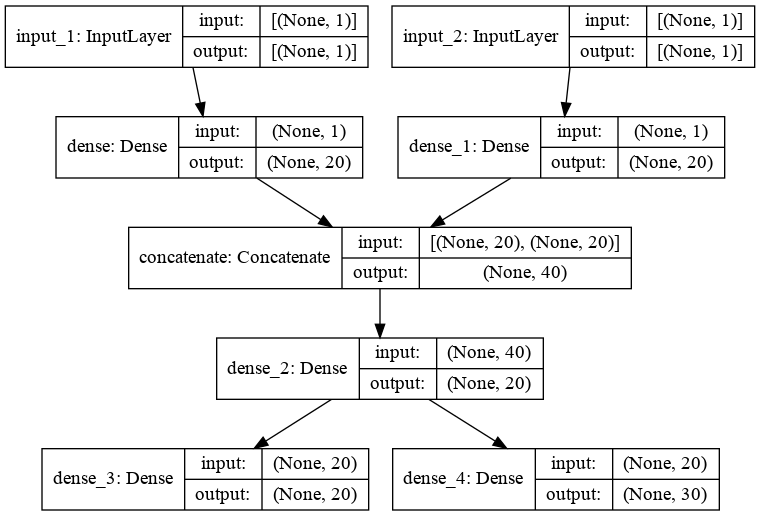

In [6]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [7]:
[y_sin,y_exp] = model.predict([X_val,X_val])

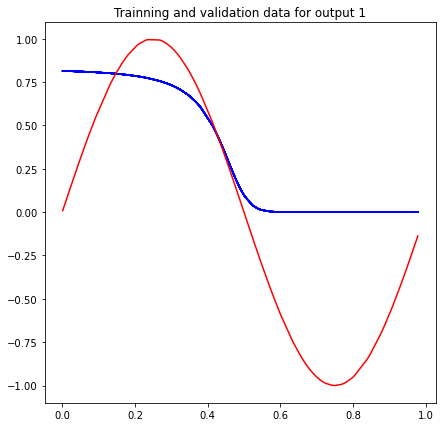

In [8]:
plt.figure(figsize = (7,7))
plt.plot(X_val,y_sin,'b')
plt.plot(X_val,y_val1,'r')
plt.title('Trainning and validation data for output 1')
plt.show()

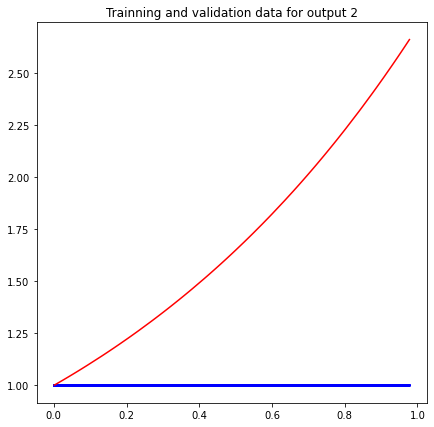

In [9]:
plt.figure(figsize = (7,7))
plt.plot(X_val,y_exp,'b')
plt.plot(X_val,y_val2,'r')
plt.title('Trainning and validation data for output 2')
plt.show()

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           40          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           40          input_2[0][0]                    
______________________________________________________________________________________________